In [1]:
import sys
sys.path.append("..")
import pandas as pd
from layzee.feature_handling2 import *
from layzee.splitter_sampler import *
from layzee.dataframe_observer import *
from layzee.modeling import Modeling
from layzee.evaluation import RegEvaluation

titanic = pd.read_csv('../data/titanic.csv')
read_df_info(titanic)

------------------
846 rows, 12 columns.
------------------
               dtype  unique   unique%  missing  missing%
PassengerId    int64     846  1.000000        0  0.000000
Pclass         int64       3  0.003546        0  0.000000
Name          object     846  1.000000        0  0.000000
Sex           object       2  0.002364        0  0.000000
Age          float64      86  0.101655      170  0.200946
SibSp          int64       7  0.008274        0  0.000000
Parch          int64       7  0.008274        0  0.000000
Ticket        object     652  0.770686        0  0.000000
Fare         float64     243  0.287234        0  0.000000
Cabin         object     143  0.169031      654  0.773050
Embarked      object       3  0.003546        2  0.002364
Survived       int64       2  0.002364        0  0.000000
------------------


In [2]:
titanic = titanic[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']]
read_df_info(titanic)

------------------
846 rows, 8 columns.
------------------
            dtype  unique   unique%  missing  missing%
Pclass      int64       3  0.003546        0  0.000000
Sex        object       2  0.002364        0  0.000000
Fare      float64     243  0.287234        0  0.000000
Age       float64      86  0.101655      170  0.200946
SibSp       int64       7  0.008274        0  0.000000
Parch       int64       7  0.008274        0  0.000000
Embarked   object       3  0.003546        2  0.002364
Survived    int64       2  0.002364        0  0.000000
------------------


-------------------------------------
Type: int64
Rows: 846
Distinct: 2
Missing: 0
Missing%: 0.0
-------------------------------------
Top 2 values:
   Survived  Count         %     Cum.%
0         0    527  0.622931  0.622931
1         1    319  0.377069  1.000000
-------------------------------------


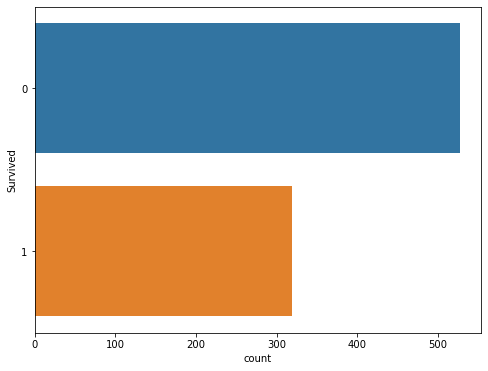

In [3]:
describe_cat_col(titanic, 'Survived')

In [4]:
train, test = split_df(titanic)
train.shape, test.shape

((676, 8), (170, 8))

In [5]:
read_df_info(train)

------------------
676 rows, 8 columns.
------------------
            dtype  unique   unique%  missing  missing%
Pclass      int64       3  0.004438        0  0.000000
Sex        object       2  0.002959        0  0.000000
Fare      float64     221  0.326923        0  0.000000
Age       float64      83  0.122781      139  0.205621
SibSp       int64       7  0.010355        0  0.000000
Parch       int64       6  0.008876        0  0.000000
Embarked   object       3  0.004438        1  0.001479
Survived    int64       2  0.002959        0  0.000000
------------------


['Age', 'Embarked']
0-0    536
1-0    139
0-1      1
dtype: int64


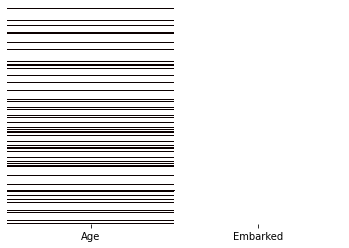

In [6]:
missing_pattern(train)

In [7]:
train,test = imputer(train,test, 'Age','median')
train,test = imputer(train,test,'Embarked','mode')

/Users/FY/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
train_ed, test_ed = general_encoder(train,test, ['Age'], None, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived'])

In [9]:
read_df_info(train_ed)
read_df_info(test_ed)

------------------
676 rows, 25 columns.
------------------
              dtype  unique   unique%  missing  missing%
Age         float64      83  0.122781        0       0.0
Pclass_1    float64       2  0.002959        0       0.0
Pclass_2    float64       2  0.002959        0       0.0
Pclass_3    float64       2  0.002959        0       0.0
Sex_female  float64       2  0.002959        0       0.0
Sex_male    float64       2  0.002959        0       0.0
SibSp_0     float64       2  0.002959        0       0.0
SibSp_1     float64       2  0.002959        0       0.0
SibSp_2     float64       2  0.002959        0       0.0
SibSp_3     float64       2  0.002959        0       0.0
SibSp_4     float64       2  0.002959        0       0.0
SibSp_5     float64       2  0.002959        0       0.0
SibSp_8     float64       2  0.002959        0       0.0
Parch_0     float64       2  0.002959        0       0.0
Parch_1     float64       2  0.002959        0       0.0
Parch_2     float64       2 

In [10]:
X_train, X_test, y_train, y_test = split_train_test(train_ed, test_ed, 'Fare')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 24), (170, 24), (676,), (170,))

In [11]:
print(X_train.columns.tolist())
print(X_test.columns.tolist())

['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived_0', 'Survived_1']
['Age', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived_0', 'Survived_1']


In [12]:
md = Modeling(X_train, X_test, y_train, y_test, task='reg', random_state=1445)
y_score, best_model, best_score, best_params = md.modeling(model='rf', metric='r2', cv=2)

Time consumption: 13.51s.


In [13]:
re = RegEvaluation(y_score, y_test)

In [14]:
re.detailed_metrics()

Explained_Variance_Score: 0.33293856422956836
Mean_Absolute_Error: 12.727493791143479
Mean_Absolute_Percentage_Error: 3684476230237395.0
Mean_Squared_Error: 1523.102466916191
Root_Mean_Squared_Error: 39.02694539566466
Pearson_Coefficient: 0.5771901594769535
R2_Score: 0.33277517491773856


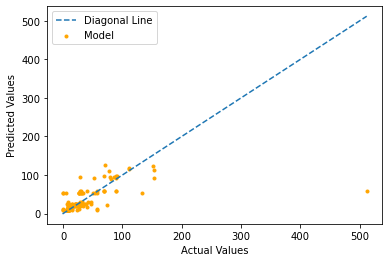

In [15]:
re.scatter_plot()

min_raw: -453.6633909241775
max_raw: 65.35174799933932
min_clipped: -49.56435106869593
max_clipped: 51.270508510927016
q25: -0.20172894510387884
q75: 3.560990928564361
median: 2.176404455091504
avg: 1.9605319383619284
std: 12.84467277813498
--------------------------------------
Shapiro test:
ShapiroResult(statistic=0.8502434492111206, pvalue=1.4115973147321714e-11)
<Error is normally distributed> can be rejected.
--------------------------------------
Error plot & QQ plot for 2% ~ 98% quantile


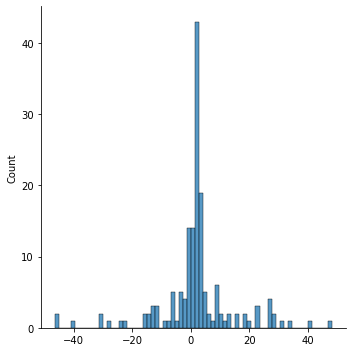

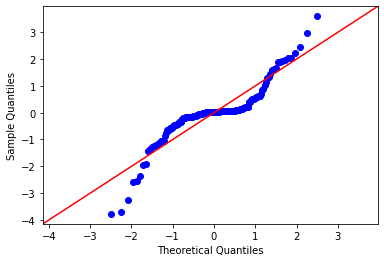

In [16]:
re.error_distribution()
